In [ ]:
!pip install gym==0.26.2

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 721.7/721.7 kB 9.3 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for gym: filename=gym-0.26.2-py3-none-any.whl size=827620 sha256=6ec6b8ca45477883066fd5db6cb5930da3eaf4f117697a7ed17d3b525fa0ff73
  Stored in directory: /root/.cache/pip/wheels/b9/22/6d/3e7b32d98451b4cd9d12417052affbeeeea012955d437da1da
Successfully built gym
  Attempting uninstall: gym
    Found existing installation: gym 0.25.2
    Uninstalling gym-0.25.2:
      Successfully uninstalled gym-0.25.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
dopamine-rl 4.0.6 requires gym<=0.25.2, but you have gym 0.26.2 which is incompatible.


In [ ]:
import gym
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [ ]:
# Задаем сид для воспроизводимости
np.random.seed(1)


In [ ]:
# gym - библиотека для моделирования различных сред, создадим среду с вагонеткой
env = gym.make('CartPole-v1')


In [ ]:
# Посмотрим на возможные действия в среде
env.action_space

Discrete(2)

In [ ]:
# Посмотрим на возможные состояния. Box означает непрерывные состояния с различными границами
env.observation_space

Box([-4.8000002e+00 -3.4028235e+38 -4.1887903e-01 -3.4028235e+38], [4.8000002e+00 3.4028235e+38 4.1887903e-01 3.4028235e+38], (4,), float32)

Есть два возможных действия - двинуться вправо и влево и 4 параметра состояния - положение вагонетки, угол столба, скорость вагонетки, скорость столба. <br> Задача - сделать максимально возможное количество движений перед тем, как конструкция упадет

Эпизод прерывается, если:
* Угол становится выше 12 градусов или 0.2095 радиан (конструкция падает)
* Позиция вагонетки >  |2.4| (вышла за границы области)
* Количество шагов выше 500 (достижение определенного количества шагов)

Награда +1 начисляется за каждый шаг в эпизоде


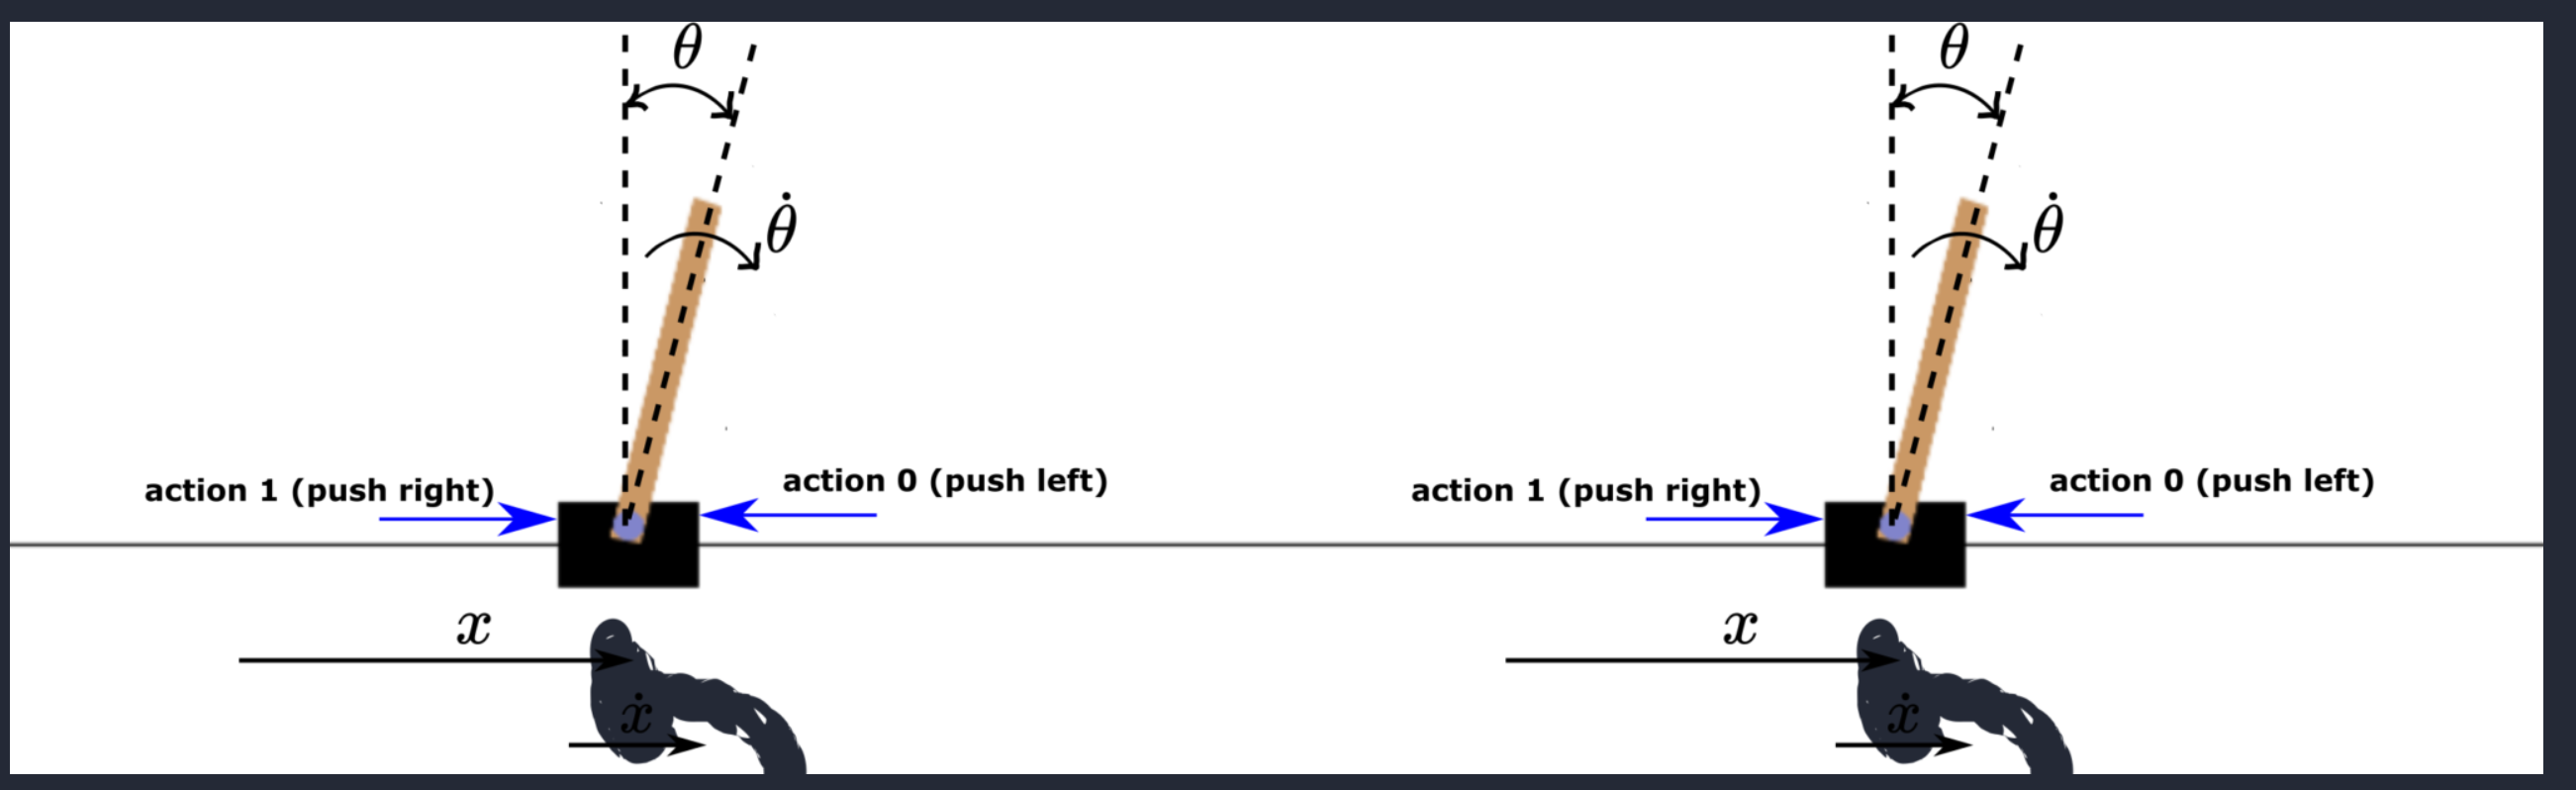

Важно: состояния в данной среде не дискретны, а непрерывны, поэтому для алгоритма Q-learning необходимо будет сделатьт дискретизацию состояний

In [ ]:
# Сбросим среду, посмотрим на изначальное состояние
env.reset()

(array([ 0.03893951, -0.00264738,  0.04639301,  0.03086469], dtype=float32),
 {})

In [ ]:
# Случайно выберем действие, выполним его в среде и посмотрим на результат выполнения
action = np.random.randint(0, env.action_space.n)
# Новое состояние, награда, завершилось ли выполнение, завершилось ли выполнение в результате достижения макс количества шагов
newState, reward, done, truncated, _  = env.step(action)

In [ ]:
newState, reward, done, truncated, _

(array([ 0.03888656,  0.19177963,  0.04701031, -0.24682738], dtype=float32),
 1.0,
 False,
 False,
 {})

Обучите алгоритм Q-learning на данной среде